# Explore here

## Paso 1: Carga del conjunto de datos


In [2]:
import numpy as np

#Extracting Files
import zipfile

zip_files = ['test1', 'train']
zip_paths = [
    r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\test1.zip',
    r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\train.zip'
]

for zip_file, zip_path in zip(zip_files, zip_paths):
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [3]:
import os
import pandas as pd

# Ruta de la carpeta de entrenamiento
train_dir = r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\train'

# Obtener la lista de nombres de archivos en la carpeta de entrenamiento
filenames = os.listdir(train_dir)

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df)


           filename category
0         cat.0.jpg        0
1         cat.1.jpg        0
2        cat.10.jpg        0
3       cat.100.jpg        0
4      cat.1000.jpg        0
...             ...      ...
24995  dog.9995.jpg        1
24996  dog.9996.jpg        1
24997  dog.9997.jpg        1
24998  dog.9998.jpg        1
24999  dog.9999.jpg        1

[25000 rows x 2 columns]


In [4]:
df.head() , df.tail()


(       filename category
 0     cat.0.jpg        0
 1     cat.1.jpg        0
 2    cat.10.jpg        0
 3   cat.100.jpg        0
 4  cat.1000.jpg        0,
            filename category
 24995  dog.9995.jpg        1
 24996  dog.9996.jpg        1
 24997  dog.9997.jpg        1
 24998  dog.9998.jpg        1
 24999  dog.9999.jpg        1)

In [5]:
category_counts = df['category'].value_counts()

print(category_counts)

category
0    12500
1    12500
Name: count, dtype: int64


## Paso 2: Visualiza la información de entrada


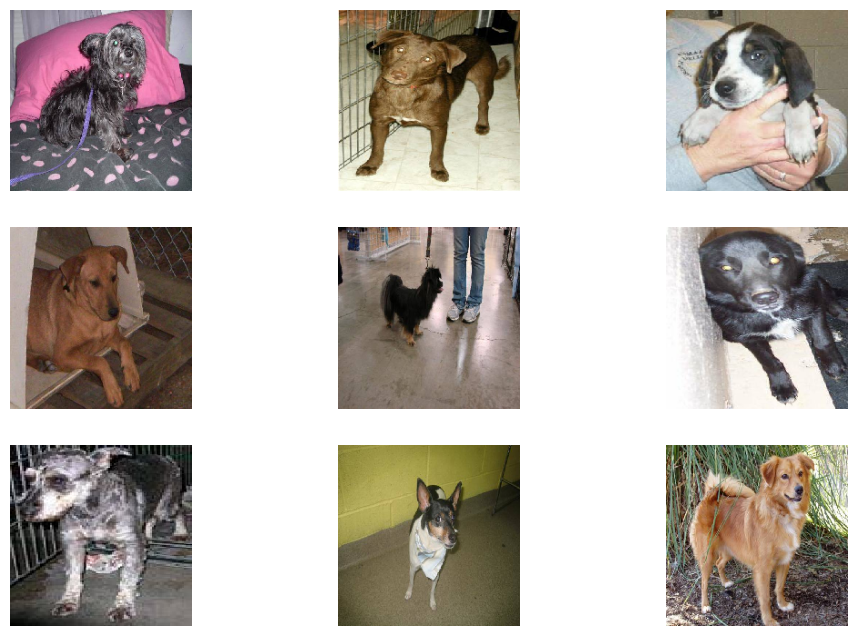

In [6]:
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Ruta de la carpeta de entrenamiento
train_dir = r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\train'

# Obtener la lista de nombres de archivos en la carpeta de entrenamiento
filenames = os.listdir(train_dir)

# Crear un DataFrame con los nombres de archivo y categorías
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Obtener nombres de archivos de perros
dog_filenames = df[df['category'] == '1']['filename']

# Mostrar todas las imágenes de perros escaladas a 200x200
num_images_to_show = 9
num_rows = (num_images_to_show + 2) // 3  # Ajustar el número de filas según la cantidad de imágenes
plt.figure(figsize=(12, 8))
for i, dog_filename in enumerate(dog_filenames[:num_images_to_show], 1):
    image = load_img(os.path.join(train_dir, dog_filename), target_size=(200, 200))
    plt.subplot(num_rows, 3, i)
    plt.imshow(image)
    plt.axis('off')
plt.show()


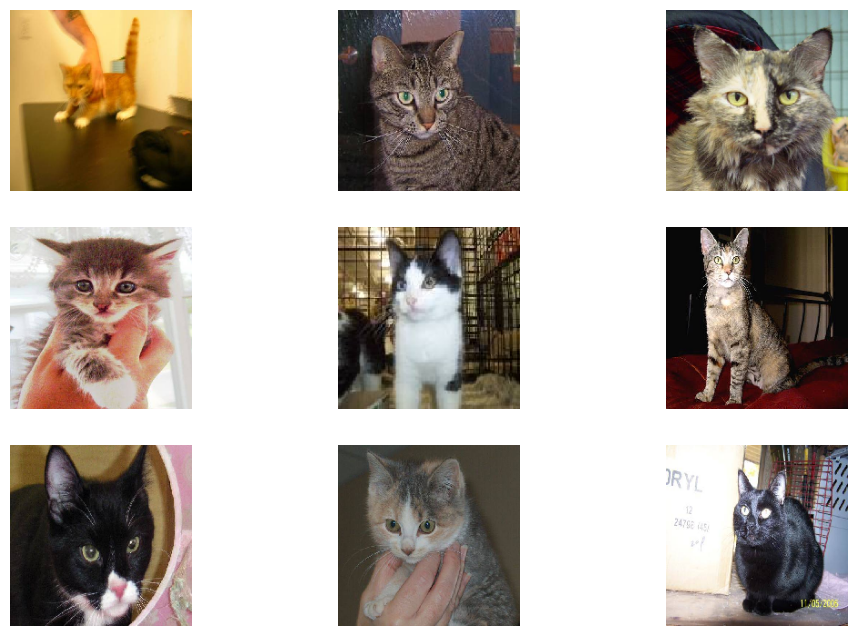

In [7]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Ruta de la carpeta de entrenamiento
train_dir = r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\train'

# Obtener la lista de nombres de archivos en la carpeta de entrenamiento
filenames = os.listdir(train_dir)

# Crear un DataFrame con los nombres de archivo y categorías
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Obtener nombres de archivos de gatos
cat_filenames = df[df['category'] == '0']['filename']

# Mostrar todas las imágenes de gatos escaladas a 200x200
num_images_to_show = 9
num_rows = (num_images_to_show + 2) // 3  # Ajustar el número de filas según la cantidad de imágenes
plt.figure(figsize=(12, 8))
for i, cat_filename in enumerate(cat_filenames[:num_images_to_show], 1):
    image = load_img(os.path.join(train_dir, cat_filename), target_size=(200, 200))
    plt.subplot(num_rows, 3, i)
    plt.imshow(image)
    plt.axis('off')
plt.show()


In [14]:
#División del conjunto de datos
train_data, valid_data = train_test_split(df, test_size=0.2, random_state = 42)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

generador de datos de entrenamiento

In [60]:
from keras.preprocessing.image import ImageDataGenerator

#Generating Training Data
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\train',  
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=15
)


Found 20000 validated image filenames belonging to 2 classes.


generador de datos de validación 

In [28]:
#Generating Validation Data
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(valid_data, 
    r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\train',  
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


## Paso 3: Construye una RNA - CNN

In [29]:
import keras

#Deep CNN Model
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=(128,128,3)),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=2, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)        

In [32]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

## Paso 4: entrenamiento modelo

In [33]:
#Model Training
model.fit(train_generator, epochs=2, verbose=1, validation_data=valid_generator)

Epoch 1/2
1334/1334 [==============================] - 1652s 1s/step - loss: 0.6939 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 2/2
1334/1334 [==============================] - 1462s 1s/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5030


## Paso 5: evaluar modelo entrenado

In [51]:
test_filenames = os.listdir(r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\test1')
test_df = pd.DataFrame({
    'filename': test_filenames
})
idlist=[]
for file in test_df["filename"]:
    idlist.append(file.split(".")[0])

#test_df['ids'] = alist
nb_samples = test_df.shape[0]

In [52]:
#Generating Test Data
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\test1', 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=15,
    shuffle=False
)

Found 12500 validated image filenames.


In [53]:
#Model Testing
predict = model.predict(test_generator, steps=np.ceil(nb_samples/15))

834/834 [==============================] - 198s 238ms/step


In [74]:
#Saving Model
model.save('cat_vs_dog_model.keras')

## Paso 5: RESULTADOS

In [115]:
#Submission
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

1/1 [==============================] - 0s 394ms/step


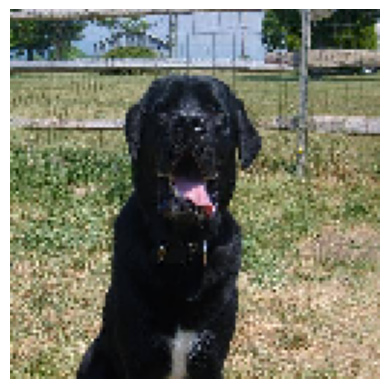

In [119]:
import random

# Selecciona una imagen al azar de tu conjunto de datos de prueba
random_index = random.randint(0, len(test_df) - 1)
random_image_filename = test_df.iloc[random_index]['filename']

# Ruta de la carpeta de imágenes de prueba
image_folder = r'C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\024-PROYECTO1-Image-Classifier-Project-Tutorial-main\src\test1'

# Crea la ruta completa de la imagen
random_image_path = os.path.join(image_folder, random_image_filename)

# Carga la imagen y redimensiona según las necesidades del modelo
random_image = load_img(random_image_path, target_size=(128, 128))
random_image_array = img_to_array(random_image)
random_image_array = random_image_array / 255.0  # Normaliza los valores de píxeles
random_image_array = np.expand_dims(random_image_array, axis=0)  # Agrega dimensión adicional

# Realiza la predicción en la imagen
random_prediction = model.predict(random_image_array)

# Decodifica la predicción en una etiqueta legible
if random_prediction[0][0] > random_prediction[0][1]:
    random_label = 'cat'
else:
    random_label = 'dog'

# Muestra la imagen y la etiqueta predicha
plt.imshow(random_image)
plt.axis('off')
plt.show()
